<a href="https://colab.research.google.com/github/joimb9064/EAI_project_problems/blob/main/Q_Learning_Taxi_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1) Needs to be installed in google colab to make the code work.**




In [ ]:
!apt-get install x11-utils
!apt-get install pyglet
!apt-get install -y xvfb python-openl


**2) Initializing the environment.**



In [ ]:
import gym

In [ ]:
env = gym.make("Taxi-v3").env


In [ ]:
env.reset()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay


In [ ]:
!apt-get install -y xvfb

!pip install gym pyvirtualdisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

**Added "import time" module because of the error KeyboardInterrupt.**

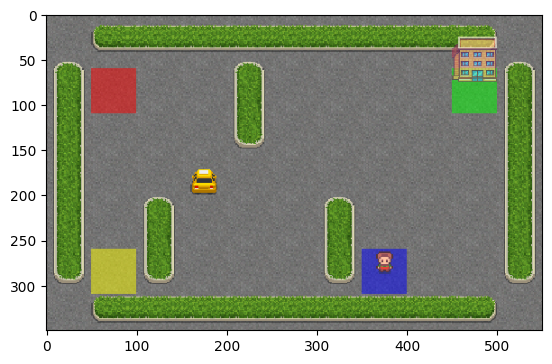

In [129]:
import matplotlib.pyplot as plt  # Importing matplotlib for rendering
from IPython import display as ipythondisplay  # Importing IPython for display management
import gym  # Import gym for the environment
import time  # Import time to add a delay between frames

# Initialize the environment (replace with your desired environment, e.g., 'CartPole-v1')
env = gym.make('Taxi-v3')

# Reset the environment
env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment
for i in range(50):
    action = env.action_space.sample()  # Take a random action
    observation, reward, done, info = env.step(action)  # Step through the environment

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()





In [130]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state= env.encode(3,1,2,0)
print("State :", state)
env.s = state


Action Space Discrete(6)
State Space Discrete(500)
State : 328


In [131]:
env.P[328]


{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [132]:
env.s = 328
epochs = 0

penalties, rewards = 0,0
frames =[]
done = False

while not done:
  action = env.action_space.sample()
  state, reward, done, info = env.step(action)

  if reward == -10:
    penalties += 1

  frames.append({
          'frame': env.render(mode='ansi'),
          'state': state,
          'action': action,
          'reward': reward,
          'penalties': penalties

      }
  )

  epochs += 1

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 150
Penalties incurred: 50


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")  # Display penalties
        sleep(1)  # Set delay to 1 second

print_frames(frames)


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 62
State: 33
Action: 5
Reward: -10
Penalties: 21


In [110]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])


**Grid Search on what are the best hyperparameters**


In [111]:
import random
import numpy as np
from IPython.display import clear_output
import gym

# Hyperparameter grid for alpha, gamma, and epsilon
alpha_grid = [0.1, 0.2, 0.3, 0.4, 0.5]
gamma_grid = [0.6, 0.7, 0.8, 0.9, 0.99]
epsilon_grid = [0.1, 0.2, 0.3, 0.4, 0.5]

# Initialize the environment
env = gym.make('Taxi-v3')

# Function to run Q-learning with specific hyperparameters
def q_learning(alpha, gamma, epsilon, episodes=10000):
    q_table = np.zeros([env.observation_space.n, env.action_space.n])
    total_epochs, total_penalties = 0, 0

    for i in range(1, episodes + 1):
        state = env.reset()
        epochs, penalties, reward = 0, 0, 0
        done = False

        while not done:
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore action space
            else:
                action = np.argmax(q_table[state])  # Exploit learned values

            next_state, reward, done, info = env.step(action)

            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])

            q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

            if reward == -10:  # Penalty for illegal moves
                penalties += 1

            state = next_state
            epochs += 1

        total_penalties += penalties
        total_epochs += epochs

    return total_epochs / episodes, total_penalties / episodes  # Average timesteps and penalties

# Grid search loop
best_params = None
best_score = float('inf')
results = []

for alpha in alpha_grid:
    for gamma in gamma_grid:
        for epsilon in epsilon_grid:
            print(f"Testing alpha={alpha}, gamma={gamma}, epsilon={epsilon}")
            avg_epochs, avg_penalties = q_learning(alpha, gamma, epsilon)
            score = avg_epochs  # Define score as the average timesteps to solve episodes
            results.append((alpha, gamma, epsilon, score, avg_penalties))

            if score < best_score:
                best_score = score
                best_params = (alpha, gamma, epsilon)

# Display the best parameters and their score
print(f"Best parameters: alpha={best_params[0]}, gamma={best_params[1]}, epsilon={best_params[2]} with score={best_score}")


Testing alpha=0.1, gamma=0.6, epsilon=0.1
Testing alpha=0.1, gamma=0.6, epsilon=0.2
Testing alpha=0.1, gamma=0.6, epsilon=0.3
Testing alpha=0.1, gamma=0.6, epsilon=0.4
Testing alpha=0.1, gamma=0.6, epsilon=0.5
Testing alpha=0.1, gamma=0.7, epsilon=0.1
Testing alpha=0.1, gamma=0.7, epsilon=0.2
Testing alpha=0.1, gamma=0.7, epsilon=0.3
Testing alpha=0.1, gamma=0.7, epsilon=0.4
Testing alpha=0.1, gamma=0.7, epsilon=0.5
Testing alpha=0.1, gamma=0.8, epsilon=0.1
Testing alpha=0.1, gamma=0.8, epsilon=0.2
Testing alpha=0.1, gamma=0.8, epsilon=0.3
Testing alpha=0.1, gamma=0.8, epsilon=0.4
Testing alpha=0.1, gamma=0.8, epsilon=0.5
Testing alpha=0.1, gamma=0.9, epsilon=0.1
Testing alpha=0.1, gamma=0.9, epsilon=0.2
Testing alpha=0.1, gamma=0.9, epsilon=0.3
Testing alpha=0.1, gamma=0.9, epsilon=0.4
Testing alpha=0.1, gamma=0.9, epsilon=0.5
Testing alpha=0.1, gamma=0.99, epsilon=0.1
Testing alpha=0.1, gamma=0.99, epsilon=0.2
Testing alpha=0.1, gamma=0.99, epsilon=0.3
Testing alpha=0.1, gamma=0.99, 

**Training the Agent**

In [121]:
%%time
"""Training the agent using Q-learning"""
import random
import numpy as np
from IPython.display import clear_output
import gym

# Initialize the environment (e.g., 'Taxi-v3') with new step API enabled
env = gym.make('Taxi-v3', new_step_api=True)

# Initialize Q-table (state space x action space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.5  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Exploration factor

# For plotting metrics
all_epochs = []
all_penalties = []

# Training loop
for i in range(1, 100001):
    state = env.reset()  # Reset the environment and get the initial state (no need to index)
    epochs, penalties, reward = 1, 1, 0
    done = False

    while not done:
        # Choose action (epsilon-greedy strategy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, done, truncated, info = env.step(action)

        # Print all the values returned by env.step()
        #print(f"Next State: {next_state}, Reward: {reward}, Done: {done}, Truncated: {truncated}, Info: {info}")

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Track penalties
        if reward == -10:
            penalties += 1

        # Move to the next state
        state = next_state
        epochs += 1

    # Print progress every 100 episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 100000
Training finished.

CPU times: user 1min 12s, sys: 7.49 s, total: 1min 20s
Wall time: 1min 20s


**Evaluating the Agent**


In [122]:
"""Evaluate agent's performance after Q-learning"""
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()  # Reset the environment
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        action = np.argmax(q_table[state])  # Choose the best action based on Q-table
        state, reward, done,truncated, info = env.step(action)  # Take the action and observe the result

        # Check if the agent received a penalty
        if reward == -10:
            penalties += 1

        epochs += 1  # Count the number of steps in the episode

    total_penalties += penalties  # Track total penalties across episodes
    total_epochs += epochs  # Track total epochs across episodes

# Print the evaluation results
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")


Results after 100 episodes:
Average timesteps per episode: 13.24
Average penalties per episode: 0.0


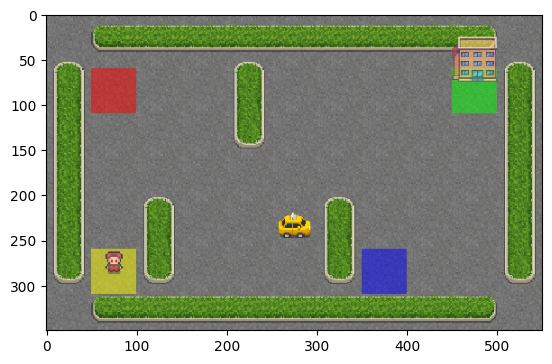

In [ ]:
import matplotlib.pyplot as plt  # Importing matplotlib for rendering
from IPython import display as ipythondisplay  # Importing IPython for display management
import gym  # Import gym for the environment
import time  # Import time to add a delay between frames

# Initialize the environment (replace with your desired environment, e.g., 'CartPole-v1')
env = gym.make('Taxi-v3')

# Reset the environment
env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment
for i in range(100):
    action = env.action_space.sample()  # Take a random action
    state, penalty, done, info = env.step(action)  # Step through the environment

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(0.1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()


**Train Agent and Save the data to Google Colab**

In [ ]:
import random
import numpy as np
from IPython.display import clear_output
import gym
from google.colab import drive, files
from datetime import datetime

# Initialize the environment (e.g., 'Taxi-v3') with new step API enabled
env = gym.make('Taxi-v3', new_step_api=True)

# Initialize Q-table (state space x action space)
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.8  # Discount factor
epsilon = 0.5  # Exploration factor

# Training loop
for i in range(1, 100001):
    state = env.reset()  # Reset the environment and get the initial state
    epochs, penalties, reward = 0, 0, 0
    done = False

    while not done:
        # Choose action (epsilon-greedy strategy)
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state])  # Exploit learned values

        # Take the action and observe the next state and reward
        next_state, reward, done, truncated, info = env.step(action)

        # Q-learning update
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        # Track penalties
        if reward == -10:
            penalties += 1

        # Move to the next state
        state = next_state
        epochs += 1

    # Print progress every 100 episodes
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

# Get the current time and date for filename
timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')

# Mount Google Drive
drive.mount('/content/drive')

# Save the Q-table with a timestamped filename
filename = f'/content/drive/MyDrive/q_table_{timestamp}.npy'
np.save(filename, q_table)
print(f"Q-table saved to Google Drive at {filename}")

# Optionally, download the Q-table to your local machine
files.download(filename)


Episode: 100000
Training finished.

Mounted at /content/drive
Q-table saved to Google Drive at /content/drive/MyDrive/q_table_2024-10-06_16-53-24.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Use the trained data from my Google Colab**

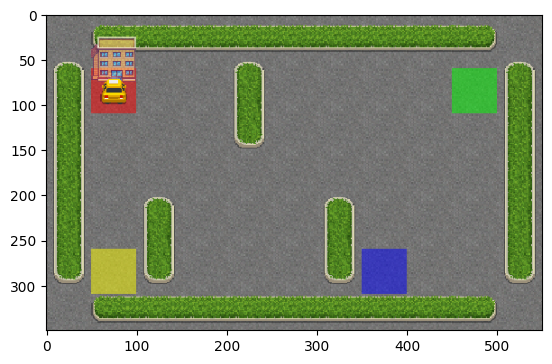

In [123]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gym
import time
import numpy as np
from google.colab import drive

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-06_16-53-24.npy')  # Replace with the correct file name

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Reset the environment and get the initial state
state = env.reset()

# Render the initial frame
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

# Loop through steps of the environment using the trained Q-table
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result
    state, reward, done, info = env.step(action)

    # Render the current frame
    screen = env.render(mode='rgb_array')

    # Display the frame using Matplotlib
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)  # Clear previous frame
    ipythondisplay.display(plt.gcf())  # Display the current frame

    # Add a small delay between frames (0.1 seconds)
    time.sleep(0.1)

    # If the episode is done, break the loop
    if done:
        break

# Clear the final output and close the environment
ipythondisplay.clear_output(wait=True)
env.close()


**Checking the result through frames**

In [ ]:
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import gym
import time
import numpy as np
from google.colab import drive
from IPython.display import clear_output
from time import sleep

# Mount Google Drive to access the saved Q-table
drive.mount('/content/drive')

# Load the trained Q-table from Google Drive
q_table = np.load('/content/drive/MyDrive/q_table_2024-10-06_16-53-24.npy')  # Replace with the correct file name

# Initialize the Taxi environment
env = gym.make('Taxi-v3')

# Function to display the frames
def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        print(f"Penalties: {frame['penalties']}")  # Display penalties
        sleep(1)  # Set delay to 1 second

# Reset the environment and get the initial state
state = env.reset()

# Store frames for rendering
frames = []

# Loop through steps of the environment using the trained Q-table
penalties = 0
for i in range(100):
    # Use the Q-table to select the best action based on the current state
    action = np.argmax(q_table[state])  # Choose action based on trained Q-table

    # Take the action and observe the result
    next_state, reward, done, info = env.step(action)

    # Track penalties
    if reward == -10:
        penalties += 1

    # Store the frame information
    frames.append({
        'frame': env.render(mode='ansi'),  # Render as text
        'state': next_state,
        'action': action,
        'reward': reward,
        'penalties': penalties
    })

    # Move to the next state
    state = next_state

    # Break if the episode is done
    if done:
        break

# Output the frames with the trained data and 1-second delay between frames
print_frames(frames)

# Close the environment
env.close()
